In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',200)

In [2]:
import missingno as msno

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
insurance=pd.read_csv('../data/insurance.csv')

<AxesSubplot:>

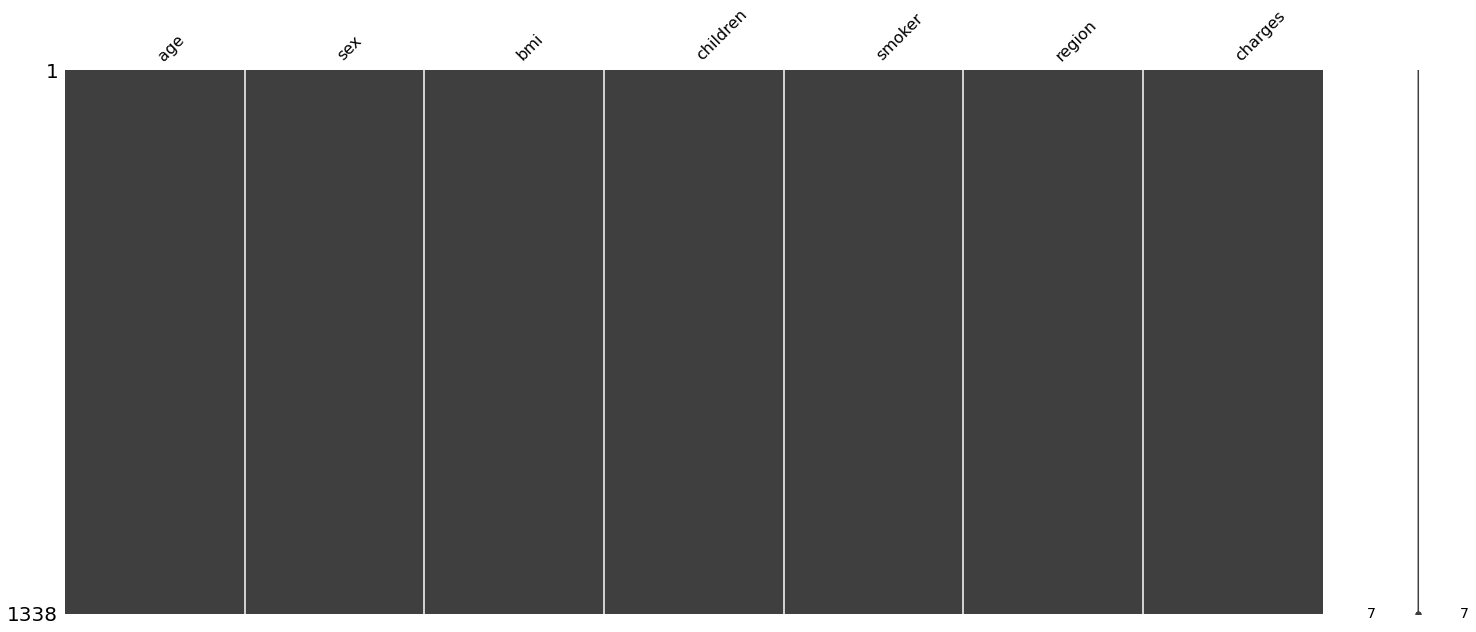

In [5]:
msno.matrix(insurance)

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
dumm_insurance=pd.get_dummies(insurance['region'])

insurance['sex']=insurance['sex'].map(lambda x: 1 if x=='female' else 0)

insurance['smoker']=insurance['smoker'].map(lambda x: 1 if x=='yes' else 0)


df_insurance= pd.concat([insurance,dumm_insurance],axis=1)

In [8]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0


In [9]:
target='charges'

cont=[col for col in df_insurance.columns if col not in [target,'region','southwest']]

In [10]:
df_insurance=df_insurance[cont+[target]].copy()

In [11]:
X_insurance=df_insurance[cont]
y_insurance=df_insurance[[target]]

In [12]:
X_train_insurance, X_test_insurance, y_train_insurance, y_test_insurance = train_test_split(X_insurance, y_insurance, test_size = 0.1, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [14]:
sc_X=StandardScaler()

X_train_std=sc_X.fit_transform(X_train_insurance)

X_test_std=sc_X.transform(X_test_insurance)

In [16]:
from sklearn.svm import SVR

In [17]:
SVR?

In [18]:
svm=SVR(kernel='poly',degree=4)

In [19]:
svm.fit(X_train_std,y_train_insurance)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(degree=4, kernel='poly')

In [20]:
svm.predict(X_test_std)


array([9268.53274326, 9270.15638052, 9319.87785086, 9299.26427669,
       9285.35383377, 9263.47969433, 9255.88335018, 9288.86161964,
       9271.09002762, 9264.71761967, 9262.84203131, 9278.53589479,
       9267.44462107, 9265.39971839, 9337.57050778, 9277.15213021,
       9290.12442098, 9263.54157719, 9263.49035058, 9368.61678152,
       9324.96383104, 9286.92687249, 9288.71254723, 9329.21730669,
       9256.65575848, 9269.99421991, 9262.3273502 , 9271.57106928,
       9263.91979139, 9269.3896057 , 9272.01067815, 9384.23203411,
       9282.95838204, 9275.92699778, 9390.68836874, 9262.5681442 ,
       9271.0447105 , 9306.88928225, 9321.44946429, 9266.62765159,
       9268.20587084, 9262.76158724, 9347.45729372, 9318.80752126,
       9370.89934145, 9261.96411654, 9276.98331434, 9263.03578018,
       9263.23930573, 9279.26293873, 9261.12921195, 9266.86908384,
       9289.37981945, 9326.81780925, 9295.62693121, 9266.77252742,
       9256.5939842 , 9273.62990212, 9260.76059267, 9284.27472

In [34]:
SVR?

In [21]:
param_grid = {"C": [x for x in range(10)],
              "kernel": ['linear', 'poly', 'rbf', 'sigmoid']}

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
gs = RandomizedSearchCV(svm, param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="r2", verbose=5)

In [24]:
gs.fit(X_train_insurance, y_train_insurance)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.5s finished
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=4, error_score=-1000,
                   estimator=SVR(degree=4, kernel='poly'), n_jobs=-1,
                   param_distributions={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='r2', verbose=5)

In [25]:
svr_gs=gs.best_estimator_

In [26]:
svr_gs

SVR(C=9, degree=4, kernel='linear')

In [27]:
gs.best_score_

-0.04207520788352348

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [29]:
def metricas_regresion(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'El r2 score es {r2}')
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

In [30]:
metricas_regresion(y_test_insurance,svm.predict(X_test_std))

El r2 score es -0.20214245605565395
El error cuadrático medio es 233099564.67059076
El error medio absoluto es 9925.755074106157


In [31]:
metricas_regresion(y_test_insurance,svr_gs.predict(X_test_std))

El r2 score es -1.5765226639501013
El error cuadrático medio es 499596622.9337423
El error medio absoluto es 18880.846951507545


In [32]:
from sklearn.kernel_ridge import KernelRidge

In [33]:
Krr=KernelRidge()

In [34]:
Krr.fit(X_train_std,y_train_insurance)

KernelRidge()

In [35]:
Krr.predict(X_test_std)

array([[ -1992.44440642],
       [ -3505.4188538 ],
       [ 24924.57043648],
       [  3094.8076142 ],
       [ -5981.35364576],
       [ -8784.85522794],
       [-11173.9416308 ],
       [  1351.2483404 ],
       [ -3946.29457519],
       [ -5499.88997521],
       [ -8119.37173255],
       [ -2662.53523666],
       [ -4310.52942206],
       [ -9153.51533888],
       [ 14769.44471125],
       [ -2219.81724749],
       [ -1724.48466334],
       [ -6741.7594477 ],
       [ -4772.76692685],
       [ 14186.71835175],
       [ 20562.92785955],
       [  1325.06812869],
       [ -1082.73327191],
       [ 19028.58854278],
       [ -8925.57862192],
       [ -3648.85454608],
       [-11572.40093746],
       [ -3180.45524418],
       [ -9195.60639003],
       [ -2598.98058404],
       [ -3933.43142304],
       [ 26790.87338898],
       [  2418.82714993],
       [   613.63708891],
       [ 11957.11514163],
       [ -7610.52387642],
       [  -499.96079176],
       [ 17436.69343188],
       [ 204

In [36]:
metricas_regresion(y_test_insurance,Krr.predict(X_test_std))

El r2 score es -0.12535410930994417
El error cuadrático medio es 218210039.63299346
El error medio absoluto es 13561.310368175004
